In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix

## Read datasets

In [3]:
train_df= pd.read_csv("data/train.csv")
test_df = pd.read_csv('data/test.csv')

print(" Shape of tran data :: ", train_df.shape)
print(" Train data columns", train_df.columns)
print(" Test columns", test_df.columns)
train_df.head()

 Shape of tran data ::  (320552, 8)
 Train data columns Index(['id', 'tid1', 'tid2', 'title1_zh', 'title2_zh', 'title1_en',
       'title2_en', 'label'],
      dtype='object')
 Test columns Index(['id', 'tid1', 'tid2', 'title1_zh', 'title2_zh', 'title1_en',
       'title2_en'],
      dtype='object')


,id,tid1,tid2,title1_zh,title2_zh,title1_en,title2_en,label
0,0,0,1,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,3,2,3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,1,2,4,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",GDP首超香港？深圳澄清：还差一点点……,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,2,2,5,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",去年深圳GDP首超香港？深圳统计局辟谣：还差611亿,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP topped Hong Kong last year? She...,unrelated
4,9,6,7,"""用大蒜鉴别地沟油的方法,怎么鉴别地沟油",吃了30年食用油才知道，一片大蒜轻松鉴别地沟油,"""How to discriminate oil from gutter oil by me...",It took 30 years of cooking oil to know that o...,agreed


In [4]:
test_df.head()

,id,tid1,tid2,title1_zh,title2_zh,title1_en,title2_en
0,321187,167562,59521,萨拉赫人气爆棚!埃及总统大选未参选获百万选票 现任总统压力山大,辟谣！里昂官方否认费基尔加盟利物浦，难道是价格没谈拢？,egypt 's presidential election failed to win m...,Lyon! Lyon officials have denied that Felipe F...
1,321190,167564,91315,萨达姆被捕后告诫美国的一句话，发人深思,10大最让美国人相信的荒诞谣言，如蜥蜴人掌控着美国,A message from Saddam Hussein after he was cap...,The Top 10 Americans believe that the Lizard M...
2,321189,167563,167564,萨达姆此项计划没有此国破坏的话，美国还会对伊拉克发动战争吗,萨达姆被捕后告诫美国的一句话，发人深思,Will the United States wage war on Iraq withou...,A message from Saddam Hussein after he was cap...
3,321193,167564,160994,萨达姆被捕后告诫美国的一句话，发人深思,被绞刑处死的萨达姆是替身？他的此男人举动击破替身谣言！,A message from Saddam Hussein after he was cap...,The hanging Saddam is a surrogate? This man's ...
4,321191,167564,15084,萨达姆被捕后告诫美国的一句话，发人深思,中国川贝枇杷膏在美国受到热捧？纯属谣言！,A message from Saddam Hussein after he was cap...,Chinese loquat loquat plaster in America? Pure...


In [5]:
title1_en_len = train_df.title1_en.str.split().str.len()
title1_en_len.describe()

count    320552.000000
mean         16.383713
std           7.898818
min           1.000000
25%          12.000000
50%          16.000000
75%          20.000000
max         500.000000
Name: title1_en, dtype: float64

In [6]:
title2_en_len = train_df.title2_en.str.split().str.len()
title2_en_len.describe()

count    320552.000000
mean         16.572637
std           8.359216
min           0.000000
25%          13.000000
50%          16.000000
75%          20.000000
max         539.000000
Name: title2_en, dtype: float64

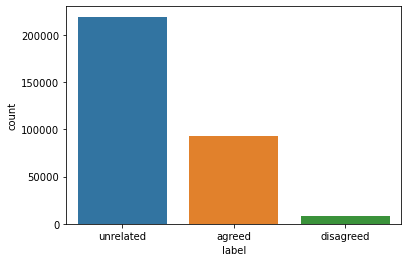

In [7]:
sns.countplot(x="label", data=train_df);
plt.show()

In [8]:
## Constants Used for cleaning the datasets
column_names = ['id', 'tid1', 'tid2', 'title1_zh', 'title2_zh', 'title1_en', 'title2_en', 'label']
remove_columns = ['id', 'tid1', 'tid2', 'title1_zh', 'title2_zh']
text_features = ['title1_en', 'title2_en']

In [9]:
train_df = train_df.drop(remove_columns,axis=1)
test_df = test_df.drop(remove_columns,axis=1)

In [10]:
train_df.head()

,title1_en,title2_en,label
0,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP topped Hong Kong last year? She...,unrelated
4,"""How to discriminate oil from gutter oil by me...",It took 30 years of cooking oil to know that o...,agreed


In [11]:
test_df.head()

,title1_en,title2_en
0,egypt 's presidential election failed to win m...,Lyon! Lyon officials have denied that Felipe F...
1,A message from Saddam Hussein after he was cap...,The Top 10 Americans believe that the Lizard M...
2,Will the United States wage war on Iraq withou...,A message from Saddam Hussein after he was cap...
3,A message from Saddam Hussein after he was cap...,The hanging Saddam is a surrogate? This man's ...
4,A message from Saddam Hussein after he was cap...,Chinese loquat loquat plaster in America? Pure...


In [12]:
train_df['title']=train_df[text_features].agg(' '.join, axis=1)
test_df['title']=test_df[text_features].agg(' '.join, axis=1)

In [13]:
train_df = train_df[["title","label"]]

In [14]:
train_df.head()

,title,label
0,There are two new old-age insurance benefits f...,unrelated
1,"""If you do not come to Shenzhen, sooner or lat...",unrelated
2,"""If you do not come to Shenzhen, sooner or lat...",unrelated
3,"""If you do not come to Shenzhen, sooner or lat...",unrelated
4,"""How to discriminate oil from gutter oil by me...",agreed


In [15]:
test_df = test_df[["title"]]

In [16]:
test_df.head()

,title
0,egypt 's presidential election failed to win m...
1,A message from Saddam Hussein after he was cap...
2,Will the United States wage war on Iraq withou...
3,A message from Saddam Hussein after he was cap...
4,A message from Saddam Hussein after he was cap...


In [17]:
title = list(train_df["title"])

## Replace multiple spaces with single space

In [18]:
title = [re.sub(' +', ' ', i) for i in title]

## Convert text to lower case

In [19]:
title = [c.lower() for c in title]

In [20]:
title[0]

'there are two new old-age insurance benefits for old people in rural areas. have you got them? police disprove "bird\'s nest congress each person gets 50,000 yuan" still old people insist on going to beijing'

## Tokenize the text

In [21]:
tokens = [word_tokenize(c) for c in title]

In [22]:
tokens[0]

['there',
 'are',
 'two',
 'new',
 'old-age',
 'insurance',
 'benefits',
 'for',
 'old',
 'people',
 'in',
 'rural',
 'areas',
 '.',
 'have',
 'you',
 'got',
 'them',
 '?',
 'police',
 'disprove',
 '``',
 'bird',
 "'s",
 'nest',
 'congress',
 'each',
 'person',
 'gets',
 '50,000',
 'yuan',
 "''",
 'still',
 'old',
 'people',
 'insist',
 'on',
 'going',
 'to',
 'beijing']

## Remove stop words

In [23]:
sw = stopwords.words("english")

In [24]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [25]:
tokens = [[word for word in t if word not in sw] for t in tokens]

In [26]:
tokens[0]

['two',
 'new',
 'old-age',
 'insurance',
 'benefits',
 'old',
 'people',
 'rural',
 'areas',
 '.',
 'got',
 '?',
 'police',
 'disprove',
 '``',
 'bird',
 "'s",
 'nest',
 'congress',
 'person',
 'gets',
 '50,000',
 'yuan',
 "''",
 'still',
 'old',
 'people',
 'insist',
 'going',
 'beijing']

## Remove punctuations

In [27]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = [["".join(tokenizer.tokenize(word)) for word in t 
          if len(tokenizer.tokenize(word)) > 0] for t in tokens]

In [28]:
tokens[0]

['two',
 'new',
 'oldage',
 'insurance',
 'benefits',
 'old',
 'people',
 'rural',
 'areas',
 'got',
 'police',
 'disprove',
 'bird',
 's',
 'nest',
 'congress',
 'person',
 'gets',
 '50000',
 'yuan',
 'still',
 'old',
 'people',
 'insist',
 'going',
 'beijing']

In [29]:
title = [" ".join(title) for title in tokens]

In [30]:
title[0]

'two new oldage insurance benefits old people rural areas got police disprove bird s nest congress person gets 50000 yuan still old people insist going beijing'

In [31]:
train_df["title"] = tokens

In [32]:
train_df.head()

,title,label
0,"[two, new, oldage, insurance, benefits, old, p...",unrelated
1,"[come, shenzhen, sooner, later, son, also, com...",unrelated
2,"[come, shenzhen, sooner, later, son, also, com...",unrelated
3,"[come, shenzhen, sooner, later, son, also, com...",unrelated
4,"[discriminate, oil, gutter, oil, means, garlic...",agreed


In [33]:
train_df.head()

,title,label
0,"[two, new, oldage, insurance, benefits, old, p...",unrelated
1,"[come, shenzhen, sooner, later, son, also, com...",unrelated
2,"[come, shenzhen, sooner, later, son, also, com...",unrelated
3,"[come, shenzhen, sooner, later, son, also, com...",unrelated
4,"[discriminate, oil, gutter, oil, means, garlic...",agreed


## Data Preparation

#### Vectorize the data

In [34]:
vect = CountVectorizer(min_df=1)

In [35]:
X = vect.fit_transform(title)

In [36]:
X.shape

(320552, 49163)

In [37]:
y = train_df["label"]

### Split the data into train and test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

In [39]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(256441, 49163) (256441,) (64111, 49163) (64111,)


### Model Training

#### Create a multi-nomial Naive Bayes' Model

In [40]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Moltinomia Navie Bayes
#from sklearn.naive_bayes import MultinomialNB
#model = MultinomialNB()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

### Predict on test set

In [41]:
y_pred = model.predict(X_test)
#y_pred = model.fit(X_train, y_train).predict(X_test)

### Visualize confusion matrix

In [42]:
conf_mat = confusion_matrix(y_test, y_pred)

In [43]:
conf_mat

array([[13888,   318,  4389],
       [   17,   911,   725],
       [11011,  2103, 30749]])

In [44]:
conf_mat = pd.DataFrame(conf_mat, columns=model.classes_, index=model.classes_)

In [45]:
conf_mat

,agreed,disagreed,unrelated
agreed,13888,318,4389
disagreed,17,911,725
unrelated,11011,2103,30749


In [46]:
#sns.heatmap(conf_mat)
#plt.show()

In [47]:
# accuracy: (tp + tn) / (p + n)
#accuracy = accuracy_score(y_test, y_pred)
#print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
#precision = precision_score(y_test, y_pred, pos_label='positive', average='micro')
#print('Precision: %f' % precision)

# recall: tp / (tp + fn)
#recall = recall_score(y_test, y_pred, pos_label='positive', average='micro')
#print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
#f1 = f1_score(y_test, y_pred, pos_label='positive', average='micro')
#print('F1 score: %f' % f1)

In [48]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      agreed       0.56      0.75      0.64     18595
   disagreed       0.27      0.55      0.37      1653
   unrelated       0.86      0.70      0.77     43863

    accuracy                           0.71     64111
   macro avg       0.56      0.67      0.59     64111
weighted avg       0.76      0.71      0.72     64111



In [49]:
#y_test

In [50]:
#y_pred

In [51]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, columns=log_model.classes_, index=log_model.classes_)
conf_mat

,agreed,disagreed,unrelated
agreed,12309,15,6271
disagreed,45,571,1037
unrelated,4790,253,38820


In [53]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      agreed       0.72      0.66      0.69     18595
   disagreed       0.68      0.35      0.46      1653
   unrelated       0.84      0.89      0.86     43863

    accuracy                           0.81     64111
   macro avg       0.75      0.63      0.67     64111
weighted avg       0.80      0.81      0.80     64111



In [54]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [55]:
# Scaling
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(X_train)
knn_model.fit((scaler.transform(X_train)),y_train)
scaler.fit(X_test)
y_pred = knn_model.predict(scaler.transform(X_test))

In [56]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, columns=knn_model.classes_, index=knn_model.classes_)
conf_mat

,agreed,disagreed,unrelated
agreed,14738,48,3809
disagreed,199,682,772
unrelated,6894,427,36542


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      agreed       0.68      0.79      0.73     18595
   disagreed       0.59      0.41      0.49      1653
   unrelated       0.89      0.83      0.86     43863

    accuracy                           0.81     64111
   macro avg       0.72      0.68      0.69     64111
weighted avg       0.82      0.81      0.81     64111



In [58]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)
y_pred = dt_model.fit(X_train, y_train).predict(X_test)

In [59]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier()

In [60]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, columns=dt_model.classes_, index=dt_model.classes_)
conf_mat

,agreed,disagreed,unrelated
agreed,13545,34,5016
disagreed,66,730,857
unrelated,4894,639,38330


In [61]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      agreed       0.73      0.73      0.73     18595
   disagreed       0.52      0.44      0.48      1653
   unrelated       0.87      0.87      0.87     43863

    accuracy                           0.82     64111
   macro avg       0.71      0.68      0.69     64111
weighted avg       0.82      0.82      0.82     64111



In [62]:
# Random Tree
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)
y_pred = rf_model.fit(X_train, y_train).predict(X_test)

In [63]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [64]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, columns=rf_model.classes_, index=rf_model.classes_)
conf_mat

,agreed,disagreed,unrelated
agreed,13992,10,4593
disagreed,21,554,1078
unrelated,2633,129,41101


In [65]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      agreed       0.84      0.75      0.79     18595
   disagreed       0.80      0.34      0.47      1653
   unrelated       0.88      0.94      0.91     43863

    accuracy                           0.87     64111
   macro avg       0.84      0.67      0.72     64111
weighted avg       0.87      0.87      0.86     64111



In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=0)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [67]:
y_pred = ada_model.predict(X_test)

In [68]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, columns=ada_model.classes_, index=ada_model.classes_)
conf_mat

,agreed,disagreed,unrelated
agreed,1673,18,16904
disagreed,15,218,1420
unrelated,1064,946,41853


In [69]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      agreed       0.61      0.09      0.16     18595
   disagreed       0.18      0.13      0.15      1653
   unrelated       0.70      0.95      0.80     43863

    accuracy                           0.68     64111
   macro avg       0.50      0.39      0.37     64111
weighted avg       0.66      0.68      0.60     64111



## Prediction

### Process test data

In [70]:
test_title = list(test_df["title"])

In [71]:
test_title = [r.lower() for r in test_title]

In [72]:
test_title[0]

"egypt 's presidential election failed to win millions of votes in egypt' s presidential election lyon! lyon officials have denied that felipe federico has joined liverpool. is it true that the price has not been agreed?"

In [73]:
test_tokens = [word_tokenize(r) for r in test_title]

In [74]:
test_tokens = [[word for word in t if word not in sw] for t in test_tokens]

In [75]:
test_tokens = [["".join(tokenizer.tokenize(word)) for word in t
              if len(tokenizer.tokenize(word))>0 ] for t in test_tokens]

In [76]:
test_title = [" ".join(title) for title in test_tokens]

In [77]:
test_df["title"] = test_tokens

In [78]:
test_df.head()

,title
0,"[egypt, s, presidential, election, failed, win..."
1,"[message, saddam, hussein, captured, top, 10, ..."
2,"[united, states, wage, war, iraq, without, des..."
3,"[message, saddam, hussein, captured, hanging, ..."
4,"[message, saddam, hussein, captured, chinese, ..."


### Vectorize test data

In [79]:
X_test = vect.transform(test_title)

### Make predictions

In [80]:
model.predict(X_test)

array(['unrelated', 'unrelated', 'unrelated', ..., 'unrelated',
       'unrelated', 'agreed'], dtype='<U9')